# Project 2: Initial exploration and data visualization
*University of Ljubljana, Faculty for computer and information science* <br />
*Course: Introduction to data science, 2021-2022*

Vito Založnik

## Environment setup

Write instructions how to setup the environment to run this notebook, which libraries are installed, etc. Also provide installation sources.

- conda create --name project_2
- conda activate project_2
- conda install python=3.7
- conda install jupyter notebook
- ipython kernel install --name project_2 --user
- conda install pandas
- conda install numpy
- conda install matplotlib
- conda install scipy
- conda install seaborn
- conda install -c conda-forge plotnine


In [1]:
# Load all the libraries needed for running the code chunks below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.pyplot import figure
import os
import sys
import time
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap



In [10]:
def add_header():
    """ads header to every event csv file"""
    arr = os.listdir("events")
    col = ["Date", "Event", "ID", "Event_count"]
    for file_name in arr:
        if file_name == "AllEvents.csv":
            pass
        elif file_name == 'NewDatasourcesAdded.csv':
            df = pd.read_csv("events/NewDatasourcesAdded.csv", skiprows=1)
            df.columns = col
            df["Date"] = pd.to_datetime(df["Date"])
            df.to_csv("events/" + file_name, index=False)
        else:
            df = pd.read_csv("events/" + file_name)
            df.columns = col
            df["Date"] = pd.to_datetime(df["Date"])
            df.to_csv("events/" + file_name, index=False)
    print("Done!")


Call function below everytime you get new data. 

In [11]:

add_header() #call function that adds header and clean some typos in data.

In [12]:
df = pd.read_csv("signups\SignupsAttributes.csv")
df.corr()

,$distinct_id,$properties.space_id,$properties.is_agency,$properties.had_trial,$properties.is_activated,$properties.has_mobile_company,$properties.sessions_company,$properties.databoards_company,$properties.cloud_sources_company,$properties.metrics_company,$properties.users_in_space,$properties.scheduled_snapshots_company,$properties.custom_queries_company,$properties.scripts_company
$distinct_id,1.000000,1.000000,-0.015631,-0.026635,-0.047689,-0.081925,-0.065452,-0.011746,-0.034459,-0.084718,-0.030067,-0.008903,-0.017628,-0.018644
$properties.space_id,1.000000,1.000000,-0.015631,-0.026635,-0.047689,-0.081925,-0.065452,-0.011746,-0.034459,-0.084718,-0.030067,-0.008903,-0.017628,-0.018644
$properties.is_agency,-0.015631,-0.015631,1.000000,0.030149,0.136357,0.031270,0.048586,0.114746,0.149513,0.088963,0.070843,0.018808,0.016956,0.027366
$properties.had_trial,-0.026635,-0.026635,0.030149,1.000000,0.319975,0.165967,0.228773,0.297752,0.315616,0.146615,0.242537,0.102841,0.146195,0.128831
$properties.is_activated,-0.047689,-0.047689,0.136357,0.319975,1.000000,0.159587,0.153867,0.328539,0.412992,0.392323,0.165366,0.110130,0.067053,0.058881
$properties.has_mobile_company,-0.081925,-0.081925,0.031270,0.165967,0.159587,1.000000,0.296427,0.226276,0.224092,0.173724,0.247263,0.124229,0.115244,0.103573
$properties.sessions_company,-0.065452,-0.065452,0.048586,0.228773,0.153867,0.296427,1.000000,0.515171,0.441458,0.317287,0.583222,0.244615,0.462233,0.439021
$properties.databoards_company,-0.011746,-0.011746,0.114746,0.297752,0.328539,0.226276,0.515171,1.000000,0.775133,0.359801,0.550160,0.297482,0.482279,0.424702
$properties.cloud_sources_company,-0.034459,-0.034459,0.149513,0.315616,0.412992,0.224092,0.441458,0.775133,1.000000,0.361670,0.472383,0.248448,0.310019,0.302025
$properties.metrics_company,-0.084718,-0.084718,0.088963,0.146615,0.392323,0.173724,0.317287,0.359801,0.361670,1.000000,0.274651,0.164252,0.315099,0.255668


# Exploration and data visualization

Your main task is to provide insights into the data to the reader through text, tables, and visualizations. Aim for a concise, efficient, and effective solution.

## Data statistics

`TODO: add code to calculate statistics`

### Statistics 1

`TODO: add code to calculate statistics`

In [13]:
# Statistics 1 code

### Statistics 2

`TODO: add code to calculate statistics`

In [14]:
# Statistics 2 code

### Statistics ...

`TODO: add code to calculate statistics`

In [15]:
# Statistics ... code

## Data visualizations

`TODO: add code to generate interesting visualizations`

### Visualization 1

`TODO: events by date, is there some ups and downs by special event...`

In [23]:
c_created = pd.read_csv("events\CalculationCreated.csv")
c_created["Date"] = pd.to_datetime(c_created["Date"])

m_added = pd.read_csv("events\MetricAdded.csv")
m_added["Date"] = pd.to_datetime(m_added["Date"])
ds_added = pd.read_csv(r"events\NewDatasourcesAdded.csv")
ds_added["Date"] = pd.to_datetime(ds_added["Date"])
q_created = pd.read_csv(r"events\QueryCreated.csv")
q_created["Date"] = pd.to_datetime(q_created["Date"])
sessions = pd.read_csv("events\Sessions.csv")
sessions["Date"] = pd.to_datetime(sessions["Date"])
s_urls = pd.read_csv("events\ShareUrl.csv")
s_urls["Date"] = pd.to_datetime(s_urls["Date"])
s_shared = pd.read_csv("events\SnapshotShared.csv")
s_shared["Date"] = pd.to_datetime(s_shared["Date"])
u_added = pd.read_csv(r"events\UsersAdded.csv")
u_added["Date"] = pd.to_datetime(u_added["Date"])


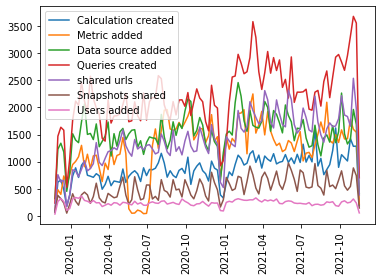

In [24]:
p1= c_created[["Date", "Event_count"]].groupby("Date").sum()

p2= m_added[["Date", "Event_count"]].groupby("Date").sum()
p3= ds_added[["Date", "Event_count"]].groupby("Date").sum()
p4 = q_created[["Date", "Event_count"]].groupby("Date").sum()
p5 = sessions[["Date", "Event_count"]].groupby("Date").sum()
p6 = s_urls[["Date", "Event_count"]].groupby("Date").sum()
p7 = s_shared[["Date", "Event_count"]].groupby("Date").sum()
p8 = u_added[["Date", "Event_count"]].groupby("Date").sum()
 
plt.plot(p1, "-", label="Calculation created")
plt.plot(p2, "-", label="Metric added")
plt.plot(p3, "-", label="Data source added")
plt.plot(p4, "-", label="Queries created")
#plt.plot(p5, "-", label="Sessions")
plt.plot(p6, "-", label="shared urls")
plt.plot(p7, "-", label="Snapshots shared")
plt.plot(p8, "-", label="Users added")

plt.xticks(rotation=90)
plt.legend()
plt.show()

L = list(p1.index)
D = pd.DataFrame()
D["D"] = L
X = list(D['D'].apply(pd.Timestamp.toordinal))




In [31]:
p1["Event_count"]

Date
2019-11-25      68
2019-12-02     625
2019-12-09     667
2019-12-16     487
2019-12-23     179
              ... 
2021-10-18    1015
2021-10-25    1426
2021-11-01    1285
2021-11-08    1288
2021-11-15     193
Name: Event_count, Length: 104, dtype: int64

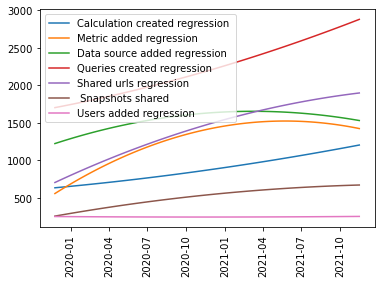

In [26]:
i=2
ply1 =  np.poly1d(np.polyfit(X[1:-1], list(p1["Event_count"])[1:-1], i))
plt.plot(L, ply1(X), label="Calculation created regression ")
ply2 = np.poly1d(np.polyfit(X[1:-1], list(p2["Event_count"])[1:-1], i))
plt.plot(L, ply2(X), label="Metric added regression ")
ply3 = np.poly1d(np.polyfit(X[1:-1], list(p3["Event_count"])[1:-1], i))
plt.plot(L, ply3(X), label="Data source added regression ")
ply4 = np.poly1d(np.polyfit(X[1:-1], list(p4["Event_count"])[1:-1], i))
plt.plot(L, ply4(X), label="Queries created regression ")
#ply5 = np.poly1d(np.polyfit(X[1:-1], list(p5["Event_count"])[1:-1], i))
#plt.plot(L, ply5(X), label="Sessions regression ")
#fit regression of correct length
ply6 = np.poly1d(np.polyfit(X[1:-1], list(p6["Event_count"])[1:-1], i))
plt.plot(L, ply6(X), label="Shared urls regression ")
ply7 = np.poly1d(np.polyfit(X[1:-1], list(p7["Event_count"])[1:-1], i))
plt.plot(L, ply7(X), label=" Snapshots shared")
ply8 = np.poly1d(np.polyfit(X[1:-1], list(p8["Event_count"])[1:-1], i))
plt.plot(L, ply8(X), label="Users added regression ")

plt.xticks(rotation=90)
plt.legend()
plt.show()



### Visualization 2

`TODO: add code to generate visualization`

In [28]:
# Visualization 2 code
L = list(p1.index)
D = pd.DataFrame()
D["D"] = L
X = list(D['D'].apply(pd.Timestamp.toordinal))


### Visualization ...

`TODO: add code to generate visualization`

In [ ]:
# Visualization ... code